In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
from scipy import optimize,stats
from mpl_toolkits.mplot3d import Axes3D
matplotlib.style.use('meter-blue')
import pysolar
%matplotlib notebook


In [3]:
def from_scratch():
    filepath = 'C:\\Users\\Alton\\Dropbox (DDI)\\BYU Turf Grass Monitoring Project\\BYU sensor data\\recent data\\'
    ndvi_df = pd.read_excel(filepath + 'Device-BYU-NDVI (5G0F4447).xls', na_values='***', index_col=0)
    pri_df = pd.read_excel(filepath + 'Device-BYU-PRI (5G0F4476).xls', na_values='***', index_col=0)
    swsoil_df = pd.read_excel(filepath + 'Device-BYUL25IV (5G0E3584).xls', na_values='***', index_col=0)#L25IV
    sesoil_df = pd.read_excel(filepath + 'Device-BYUL24VI (5G0E3579).xls', na_values='***', index_col=0)#L24VI
    nwsoil_df = pd.read_excel(filepath + 'Device-BYUS3VII (5G0E3585).xls', na_values='***', index_col=0)#S3VII
    nesoil_df = pd.read_excel(filepath + 'Device-BYU-S2V (5G0E3576).xls', na_values='***', index_col=0)#S2v
    weather_df = pd.read_excel(filepath + 'Device-BYU-HANS (5G0E4037).xls', na_values='***', index_col=0)#HANS

    for x in [ndvi_df, 
              pri_df,
              swsoil_df,
              sesoil_df,
              nwsoil_df,
              nesoil_df,
              weather_df]:
        x.index = pd.to_datetime(x.index)
    
    
    ndvi_df.columns = ['SRS-Ni 630 nm',
                       'SRS-Ni 800 nm',
                       'S SRS-Pr 532 nm',
                       'S SRS-Pr 570 nm',
                       'S SRS-Nr 630 nm',
                       'S SRS-Nr 800 nm']
    pri_df.columns = ['SRS-Pi 532 nm',
                      'SRS-Pi 570 nm',
                      'N SRS-Pr 532 nm',
                      'N SRS-Pr 570 nm',
                      'N SRS-Nr 630 nm',
                      'N SRS-Nr 800 nm']
    swsoil_df.columns = ['SW GS3 6cm EC mS/cm', 
                         'SW GS3 6cm Temp °C',
                         'SW GS3 6cm Moisture m³/m³',
                         'SW MPS-2 6cm Water Potential kPa',
                         'SW MPS-2 6cm Temp °C',
                         'SW GS3 15cm EC mS/cm',
                         'SW GS3 15cm Temp °C',
                         'SW GS3 15cm Moisture m³/m³',
                         'SW MPS-2 15cm Water Potential kPa',
                         'SW MPS-2 15cm Temp °C',
                         'SW GS3 30cm EC  mS/cm',
                         'SW GS3 30cm Temp °C',
                         'SW GS3 30cm Moisture m³/m³']
    sesoil_df.columns = ['SE GS3 6cm EC mS/cm', 
                         'SE GS3 6cm Temp °C',
                         'SE GS3 6cm Moisture m³/m³',
                         'SE MPS-2 6cm Water Potential kPa',
                         'SE MPS-2 6cm Temp °C',
                         'SE GS3 15cm EC mS/cm',
                         'SE GS3 15cm Temp °C',
                         'SE GS3 15cm Moisture m³/m³',
                         'SE MPS-2 15cm Water Potential kPa',
                         'SE MPS-2 15cm Temp °C',
                         'SE GS3 30cm EC  mS/cm',
                         'SE GS3 30cm Temp °C',
                         'SE GS3 30cm Moisture m³/m³',
                         'SE negative potential']
    #Remove unneeded column
    sesoil_df = sesoil_df[['SE GS3 6cm EC mS/cm', 
                         'SE GS3 6cm Temp °C',
                         'SE GS3 6cm Moisture m³/m³',
                         'SE MPS-2 6cm Water Potential kPa',
                         'SE MPS-2 6cm Temp °C',
                         'SE GS3 15cm EC mS/cm',
                         'SE GS3 15cm Temp °C',
                         'SE GS3 15cm Moisture m³/m³',
                         'SE MPS-2 15cm Water Potential kPa',
                         'SE MPS-2 15cm Temp °C',
                         'SE GS3 30cm EC  mS/cm',
                         'SE GS3 30cm Temp °C',
                         'SE GS3 30cm Moisture m³/m³']]
    nwsoil_df.columns = ['NW GS3 6cm EC mS/cm', 
                         'NW GS3 6cm Temp °C',
                         'NW GS3 6cm Moisture m³/m³',
                         'NW MPS-2 6cm Water Potential kPa',
                         'NW MPS-2 6cm Temp °C',
                         'NW GS3 15cm EC mS/cm',
                         'NW GS3 15cm Temp °C',
                         'NW GS3 15cm Moisture m³/m³',
                         'NW MPS-2 15cm Water Potential kPa',
                         'NW MPS-2 15cm Temp °C',
                         'NW GS3 30cm EC  mS/cm',
                         'NW GS3 30cm Temp °C',
                         'NW GS3 30cm Moisture m³/m³']
    nesoil_df.columns = ['NE GS3 6cm EC mS/cm', 
                         'NE GS3 6cm Temp °C',
                         'NE GS3 6cm Moisture m³/m³',
                         'NE MPS-2 6cm Water Potential kPa',
                         'NE MPS-2 6cm Temp °C',
                         'NE GS3 15cm EC mS/cm',
                         'NE GS3 15cm Temp °C',
                         'NE GS3 15cm Moisture m³/m³',
                         'NE MPS-2 15cm Water Potential kPa',
                         'NE MPS-2 15cm Temp °C',
                         'NE GS3 30cm EC  mS/cm',
                         'NE GS3 30cm Temp °C',
                         'NE GS3 30cm Moisture m³/m³',
                         'NE negative potential 1',
                         'NE negative potential 2']
    #Remove two unneeded columns
    nesoil_df = nesoil_df[['NE GS3 6cm EC mS/cm', 
                         'NE GS3 6cm Temp °C',
                         'NE GS3 6cm Moisture m³/m³',
                         'NE MPS-2 6cm Water Potential kPa',
                         'NE MPS-2 6cm Temp °C',
                         'NE GS3 15cm EC mS/cm',
                         'NE GS3 15cm Temp °C',
                         'NE GS3 15cm Moisture m³/m³',
                         'NE MPS-2 15cm Water Potential kPa',
                         'NE MPS-2 15cm Temp °C',
                         'NE GS3 30cm EC  mS/cm',
                         'NE GS3 30cm Temp °C',
                         'NE GS3 30cm Moisture m³/m³']]
    weather_df.columns = ['VP-3 Humidity RH',
                          'VP-3 Temp °C',
                          'PYR Solar Radiation W/m²', 
                          'ECRN-100 Precipitation mm',
                          'DS-2 Direction °',
                          'DS-2 Max Gust m/s',
                          'DS-2 Average Wind m/s']

    df = ndvi_df.join(pri_df.join(swsoil_df.join(sesoil_df.join(nesoil_df.join(nwsoil_df.join(weather_df, how='outer'), how='outer'), how='outer'), how='outer'), how='outer'), how='outer')

    timeseries = pd.Series(df.index.values,df.index.values)

    latitude = 40.245198
    longitude = -111.641748
    altitude = 1406

    zenithangles = pd.Series([90.0-pysolar.solar.get_altitude(latitude,longitude,x) for x in timeseries.tz_localize('Etc/GMT+6')],timeseries.index)

    df['Solar Zenith Angle']=zenithangles
    df['N raw NDVI'] = ((df['N SRS-Nr 800 nm']/df['SRS-Ni 800 nm'])
              -(df['N SRS-Nr 630 nm']/df['SRS-Ni 630 nm'])
             )/((df['N SRS-Nr 800 nm']/df['SRS-Ni 800 nm'])
                +(df['N SRS-Nr 630 nm']/df['SRS-Ni 630 nm']))
    df['S raw NDVI'] = ((df['S SRS-Nr 800 nm']/df['SRS-Ni 800 nm'])
              -(df['S SRS-Nr 630 nm']/df['SRS-Ni 630 nm'])
             )/((df['S SRS-Nr 800 nm']/df['SRS-Ni 800 nm'])
                +(df['S SRS-Nr 630 nm']/df['SRS-Ni 630 nm']))
    df['N raw PRI'] = ((df['N SRS-Pr 532 nm']/df['SRS-Pi 532 nm'])
              -(df['N SRS-Pr 570 nm']/df['SRS-Pi 570 nm'])
             )/((df['N SRS-Pr 532 nm']/df['SRS-Pi 532 nm'])
              +(df['N SRS-Pr 570 nm']/df['SRS-Pi 570 nm']))
    df['S raw PRI'] = ((df['S SRS-Pr 532 nm']/df['SRS-Pi 532 nm'])
              -(df['S SRS-Pr 570 nm']/df['SRS-Pi 570 nm'])
             )/((df['S SRS-Pr 532 nm']/df['SRS-Pi 532 nm'])
              +(df['S SRS-Pr 570 nm']/df['SRS-Pi 570 nm']))
    
    pri_alpha = 0.91
    ndvi_alpha = 1.27
    
    df['N alpha NDVI'] = (ndvi_alpha*df['N SRS-Nr 800 nm']-df['N SRS-Nr 630 nm'])/(ndvi_alpha*df['N SRS-Nr 800 nm']+df['N SRS-Nr 630 nm'])
    df['S alpha NDVI'] = (ndvi_alpha*df['S SRS-Nr 800 nm']-df['S SRS-Nr 630 nm'])/(ndvi_alpha*df['S SRS-Nr 800 nm']+df['S SRS-Nr 630 nm'])
    df['N alpha PRI'] = (pri_alpha*df['N SRS-Pr 532 nm']-df['N SRS-Pr 570 nm'])/(pri_alpha*df['N SRS-Pr 532 nm']+df['N SRS-Pr 570 nm'])
    df['S alpha PRI'] = (pri_alpha*df['S SRS-Pr 532 nm']-df['S SRS-Pr 570 nm'])/(pri_alpha*df['S SRS-Pr 532 nm']+df['S SRS-Pr 570 nm'])
    df.to_excel(filepath + 'Turf Grass All to 2016-Jun-24.xls')
    return df

In [4]:
def from_saved():
    filepath = 'C:\\Users\\Alton\\Dropbox (DDI)\\BYU Turf Grass Monitoring Project\\BYU sensor data\\recent data\\'
    df = pd.read_excel(filepath + 'Turf Grass All to 2016-Jun-24.xls')
    return df

In [5]:
#df = from_scratch()
df = from_saved()

def get_text_from_figure(figure):
    texts = []
    for x in figure.get_default_bbox_extra_artists():
        if type(x) is matplotlib.text.Text:
            texts.append(x)
    return texts

def apply_meter_blue(figure):
    meter_blue = '#03528a'
    meter_fifty = '#98adc7'
    meter_thirty = '#c0cbde'
    for ax in fig.get_axes():
        ax.tick_params(axis='both',which='both',top=False,right=False,color=meter_thirty)
        ax.spines['top'].set_visible(False)
        ax.spines['right'].set_visible(False)
    for x in get_text_from_figure(fig):
        x.set_color(meter_blue)

<IPython.core.display.Javascript object>


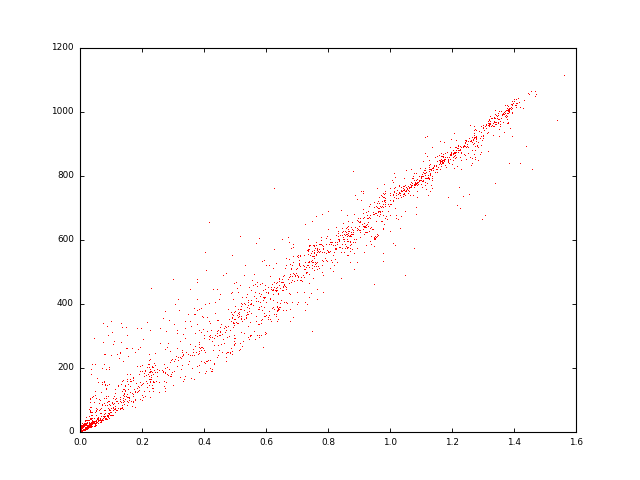

In [9]:
fig = plt.figure(num=33)
ax = fig.add_subplot(111)
ax.plot(df['SRS-Ni 630 nm']['2015-06':'2015-10'],df['PYR Solar Radiation W/m²']['2015-06':'2015-10'],'r,')

In [6]:
et = pd.read_excel('C:\\Users\\Alton\\Dropbox (DDI)\\BYU Turf Grass Monitoring Project\\BYU sensor data\\recent data\\Daily ET.xlsx')

In [7]:
et = et.dropna().set_index('Date')

In [8]:
df = df.replace('***',np.nan)

In [9]:
formatter=matplotlib.dates.DateFormatter('%b %Y')
monthlocator=matplotlib.dates.MonthLocator()

<IPython.core.display.Javascript object>


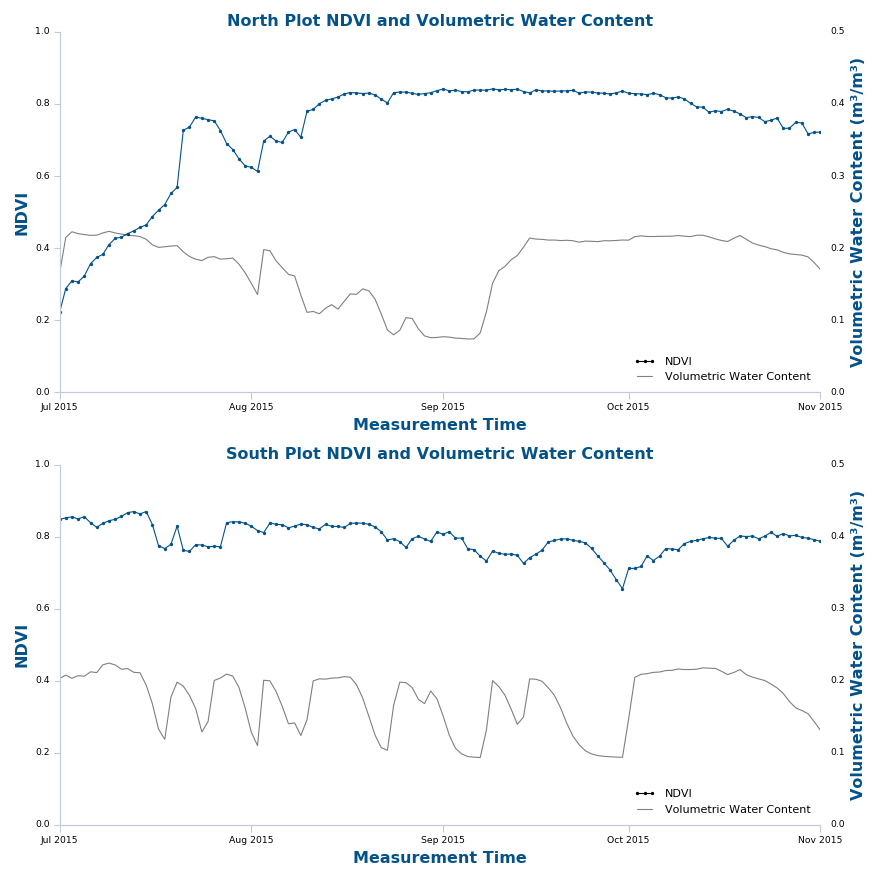

In [10]:
#### NDVI vs VWC
const_air_mass = (df['Solar Zenith Angle'] > 48-8) & (df['Solar Zenith Angle'] < 48+8)
day_time = (df['Solar Zenith Angle'] < 70)
fig = plt.figure(num=1,figsize=(11,11),facecolor='white',edgecolor='white')


#North
#NDVI
ax1 = fig.add_subplot(211)
ax1.plot(df['N raw NDVI'][day_time].resample('D').median().index,df['N raw NDVI'][day_time].resample('D').median(),'.-')
#ax1.plot(df['N raw NDVI'][const_air_mass].resample('D').mean().index,df['N raw NDVI'][const_air_mass].resample('D').mean(),'.')
ax1.set_xlabel('Measurement Time')
ax1.set_ylabel('NDVI')
ax1.set_title('North Plot NDVI and Volumetric Water Content')
#VWC
ax2 = ax1.twinx()
ax2.plot(df['NE GS3 6cm Moisture m³/m³'].resample('D').mean().index,df['NE GS3 6cm Moisture m³/m³'].resample('D').mean(),color=(0,0,0,0.5))
ax2.set_ylabel('Volumetric Water Content (m³/m³)')

#ax2.yaxis.set_label_coords(0,0.5)


#South
#NDVI
ax3 = fig.add_subplot(212)
ax3.plot(df['S raw NDVI'][day_time].resample('D').median().index,df['S alpha NDVI'][day_time].resample('D').median(),'.-')
#ax3.plot(df['S raw NDVI'][day_time].index,df['S raw NDVI'][day_time],'.')
ax3.set_xlabel('Measurement Time')
ax3.set_ylabel('NDVI')
ax3.set_title('South Plot NDVI and Volumetric Water Content')
#ax1.yaxis.set_label_coords(0,0.5)

#VWC
ax4 = ax3.twinx()
ax4.plot(df['SE GS3 6cm Moisture m³/m³'].resample('D').mean().index,df['SE GS3 6cm Moisture m³/m³'].resample('D').mean(),color=(0,0,0,0.5))
ax4.set_ylabel('Volumetric Water Content (m³/m³)')
#ax2.yaxis.set_label_coords(0,0.5)

#Custom Legends
grayline = matplotlib.lines.Line2D(xdata=[0],ydata=[0],ls='-',c=(0,0,0,0.5))
blackdotline = matplotlib.lines.Line2D(xdata=[0],ydata=[0],ls='-',marker='.',c=(0,0,0,1))
ax1.legend([blackdotline,grayline],['NDVI','Volumetric Water Content'],numpoints=3,loc='lower right',frameon=False)
ax3.legend([blackdotline,grayline],['NDVI','Volumetric Water Content'],numpoints=3,loc='lower right',frameon=False)

for ax in fig.axes:
    ax.xaxis.set_major_locator(monthlocator)
    ax.xaxis.set_major_formatter(formatter)
    ax.set_xlim('2015-07','2015-11')
    
    #ax.grid(True)
    #ax.set_frame_on(False)
    
ax1.set_ylim(0,1)
ax3.set_ylim(0,1)
ax2.set_ylim(0,0.5)
ax4.set_ylim(0,0.5)

#plt.savefig('C:\\Users\\Alton\\Desktop\\test.svg')


apply_meter_blue(plt)


<IPython.core.display.Javascript object>


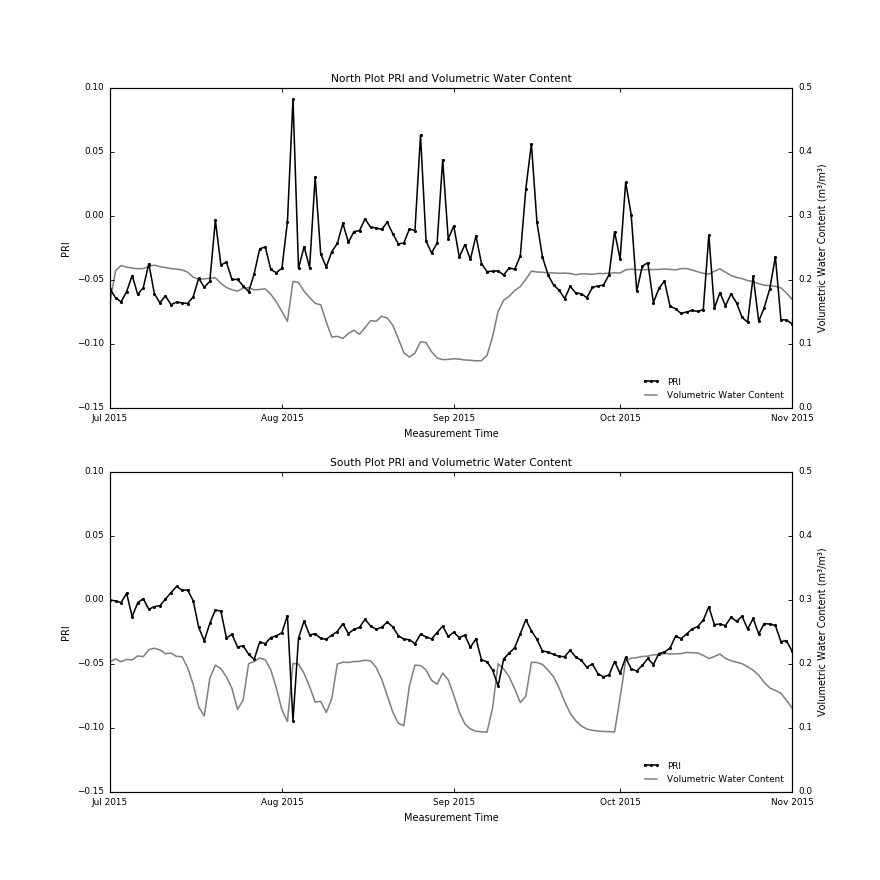

In [11]:
#### PRI vs VWC
const_air_mass = (df['Solar Zenith Angle'] > 48-8) & (df['Solar Zenith Angle'] < 48+8)
day_time = (df['Solar Zenith Angle'] < 70)
fig = plt.figure(num=2,figsize=(11,11),facecolor='white',edgecolor='white')


#North
#PRI
ax1 = fig.add_subplot(211)
#ax1.plot(df['N alpha PRI'][const_air_mass].resample('D').mean().index,df['N alpha PRI'][const_air_mass].resample('D').mean(),'.-')
ax1.plot(df['N raw PRI'][const_air_mass].resample('D').mean().index,df['N raw PRI'][const_air_mass].resample('D').mean(),'.-')
ax1.set_xlabel('Measurement Time')
ax1.set_ylabel('PRI')
ax1.set_title('North Plot PRI and Volumetric Water Content')
#VWC
ax2 = ax1.twinx()
ax2.plot(df['NE GS3 6cm Moisture m³/m³'].resample('D').mean().index,df['NE GS3 6cm Moisture m³/m³'].resample('D').mean(),color=(0,0,0,0.5))
ax2.set_ylabel('Volumetric Water Content (m³/m³)')

#ax2.yaxis.set_label_coords(0,0.5)


#South
#PRI
ax3 = fig.add_subplot(212)
#ax3.plot(df['S alpha PRI'][const_air_mass].resample('D').mean().index,df['S alpha PRI'][const_air_mass].resample('D').mean(),'.-')
ax3.plot(df['S raw PRI'][const_air_mass].resample('D').mean().index,df['S raw PRI'][const_air_mass].resample('D').mean(),'.-')
ax3.set_xlabel('Measurement Time')
ax3.set_ylabel('PRI')
ax3.set_title('South Plot PRI and Volumetric Water Content')
#ax1.yaxis.set_label_coords(0,0.5)

#VWC
ax4 = ax3.twinx()
ax4.plot(df['SE GS3 6cm Moisture m³/m³'].resample('D').mean().index,df['SE GS3 6cm Moisture m³/m³'].resample('D').mean(),color=(0,0,0,0.5))
ax4.set_ylabel('Volumetric Water Content (m³/m³)')
#ax2.yaxis.set_label_coords(0,0.5)

#Custom Legends
grayline = matplotlib.lines.Line2D(xdata=[0],ydata=[0],ls='-',c=(0,0,0,0.5))
blackdotline = matplotlib.lines.Line2D(xdata=[0],ydata=[0],ls='-',marker='.',c=(0,0,0,1))
ax1.legend([blackdotline,grayline],['PRI','Volumetric Water Content'],numpoints=3,loc='lower right',frameon=False)
ax3.legend([blackdotline,grayline],['PRI','Volumetric Water Content'],numpoints=3,loc='lower right',frameon=False)

    
ax1.set_ylim(-0.15,0.1)
ax3.set_ylim(-0.15,0.1)
ax2.set_ylim(0,0.5)
ax4.set_ylim(0,0.5)

for ax in fig.axes:
    ax.xaxis.set_major_locator(monthlocator)
    ax.xaxis.set_major_formatter(formatter)
    ax.set_xlim('2015-07','2015-11')
    #ax.grid(True)
    #ax.set_frame_on(False)

<IPython.core.display.Javascript object>


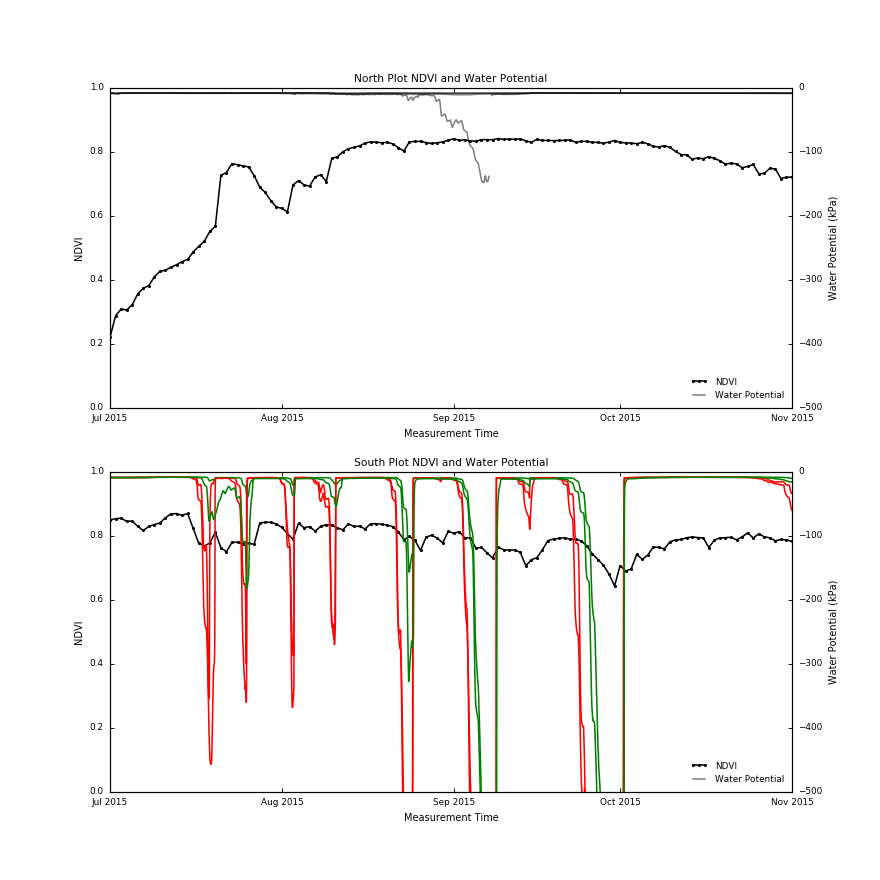

(-500, 0)

In [12]:
#### NDVI vs WMP
const_air_mass = (df['Solar Zenith Angle'] > 48-8) & (df['Solar Zenith Angle'] < 48+8)
day_time = (df['Solar Zenith Angle'] < 70)
fig = plt.figure(num=3,figsize=(11,11),facecolor='white',edgecolor='white')


#North
#NDVI
ax1 = fig.add_subplot(211)
#ax1.plot(df['N alpha NDVI'][const_air_mass].resample('D').mean().index,df['N alpha NDVI'][const_air_mass].resample('D').mean(),'.-')
ax1.plot(df['N raw NDVI'][day_time].resample('D').median().index,df['N raw NDVI'][day_time].resample('D').median(),'.-')
ax1.set_xlabel('Measurement Time')
ax1.set_ylabel('NDVI')
ax1.set_title('North Plot NDVI and Water Potential')
#Potential
ax2 = ax1.twinx()
#ax2.plot(df['NE MPS-2 6cm Water Potential kPa'].resample('D').mean().index,df['NE MPS-2 6cm Water Potential kPa'].resample('D').mean(),color=(0,0,0,0.5))
ax2.plot(df['NE MPS-2 6cm Water Potential kPa'].index,df['NE MPS-2 6cm Water Potential kPa'],color=(0,0,0,0.5))
ax2.plot(df['NE MPS-2 15cm Water Potential kPa'].index,df['NE MPS-2 15cm Water Potential kPa'],color=(0,0,0,0.5))
ax2.plot(df['NW MPS-2 6cm Water Potential kPa'].index,df['NW MPS-2 6cm Water Potential kPa'],color=(0,0,0,0.5))
ax2.plot(df['NW MPS-2 15cm Water Potential kPa'].index,df['NW MPS-2 15cm Water Potential kPa'],color=(0,0,0,0.5))
ax2.set_ylabel('Water Potential (kPa)')

#ax2.yaxis.set_label_coords(0,0.5)


#South
#NDVI
ax3 = fig.add_subplot(212)
ax3.plot(df['S raw NDVI'][day_time].resample('D').median().index,df['S raw NDVI'][day_time].resample('D').median(),'.-')
ax3.set_xlabel('Measurement Time')
ax3.set_ylabel('NDVI')
ax3.set_title('South Plot NDVI and Water Potential')
#ax1.yaxis.set_label_coords(0,0.5)

#Potential
ax4 = ax3.twinx()
ax4.plot(df['SE MPS-2 6cm Water Potential kPa'].index,df['SE MPS-2 6cm Water Potential kPa'],color='r')
ax4.plot(df['SE MPS-2 15cm Water Potential kPa'].index,df['SE MPS-2 15cm Water Potential kPa'],color='g')
ax4.plot(df['SW MPS-2 6cm Water Potential kPa'].index,df['SW MPS-2 6cm Water Potential kPa'],color='r')
ax4.plot(df['SW MPS-2 15cm Water Potential kPa'].index,df['SW MPS-2 15cm Water Potential kPa'],color='g')
#marker = (df['SE MPS-2 6cm Water Potential kPa'] < -275)&(df['SE MPS-2 6cm Water Potential kPa'] > -325)
#ax4.plot(df['SE MPS-2 6cm Water Potential kPa'][marker].index,df['SE MPS-2 6cm Water Potential kPa'][marker],'rs')

ax4.set_ylabel('Water Potential (kPa)')
#ax2.yaxis.set_label_coords(0,0.5)

#Custom Legends
grayline = matplotlib.lines.Line2D(xdata=[0],ydata=[0],ls='-',c=(0,0,0,0.5))
blackdotline = matplotlib.lines.Line2D(xdata=[0],ydata=[0],ls='-',marker='.',c=(0,0,0,1))
ax1.legend([blackdotline,grayline],['NDVI','Water Potential'],numpoints=3,loc='lower right',frameon=False)
ax3.legend([blackdotline,grayline],['NDVI','Water Potential'],numpoints=3,loc='lower right',frameon=False)

for ax in fig.axes:
    ax.xaxis.set_major_locator(monthlocator)
    ax.xaxis.set_major_formatter(formatter)
    ax.set_xlim('2015-07','2015-11')
    #ax.grid(True)
    #ax.set_frame_on(False)
    
ax1.set_ylim(0,1)
ax3.set_ylim(0,1)
ax2.set_ylim(-500,0)
#ax2.yaxis.set_major_locator(matplotlib.ticker.MultipleLocator(300))
ax4.set_ylim(-500,0)
#ax4.yaxis.set_major_locator(matplotlib.ticker.MultipleLocator(300))


<IPython.core.display.Javascript object>


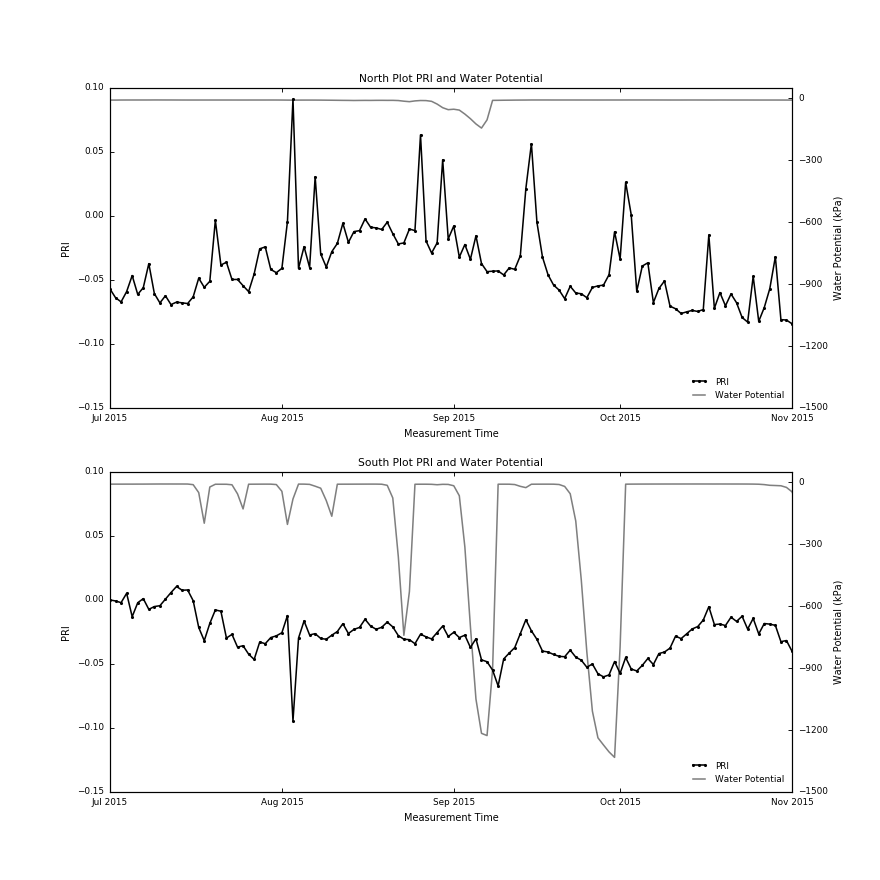

In [13]:
#### PRI vs WMP
const_air_mass = (df['Solar Zenith Angle'] > 48-8) & (df['Solar Zenith Angle'] < 48+8)
day_time = (df['Solar Zenith Angle'] < 80)
fig = plt.figure(num=4,figsize=(11,11),facecolor='white',edgecolor='white')


#North
#PRI
ax1 = fig.add_subplot(211)
ax1.plot(df['N raw PRI'][const_air_mass].resample('D').mean().index,df['N raw PRI'][const_air_mass].resample('D').mean(),'.-')
#ax1.plot(df['N alpha PRI'][day_time].resample('D').mean().index,df['N alpha PRI'][day_time].resample('D').mean(),'.')
ax1.set_xlabel('Measurement Time')
ax1.set_ylabel('PRI')
ax1.set_title('North Plot PRI and Water Potential')
#Potential
ax2 = ax1.twinx()
ax2.plot(df['NE MPS-2 6cm Water Potential kPa'].resample('D').mean().index,df['NE MPS-2 6cm Water Potential kPa'].resample('D').mean(),color=(0,0,0,0.5))
ax2.set_ylabel('Water Potential (kPa)')

#ax2.yaxis.set_label_coords(0,0.5)


#South
#PRI
ax3 = fig.add_subplot(212)
ax3.plot(df['S raw PRI'][const_air_mass].resample('D').mean().index,df['S raw PRI'][const_air_mass].resample('D').mean(),'.-')
ax3.set_xlabel('Measurement Time')
ax3.set_ylabel('PRI')
ax3.set_title('South Plot PRI and Water Potential')
#ax1.yaxis.set_label_coords(0,0.5)

#Potential
ax4 = ax3.twinx()
ax4.plot(df['SE MPS-2 6cm Water Potential kPa'].resample('D').mean().index,df['SE MPS-2 6cm Water Potential kPa'].resample('D').mean(),color=(0,0,0,0.5))
ax4.set_ylabel('Water Potential (kPa)')
#ax2.yaxis.set_label_coords(0,0.5)

#Custom Legends
grayline = matplotlib.lines.Line2D(xdata=[0],ydata=[0],ls='-',c=(0,0,0,0.5))
blackdotline = matplotlib.lines.Line2D(xdata=[0],ydata=[0],ls='-',marker='.',c=(0,0,0,1))
ax1.legend([blackdotline,grayline],['PRI','Water Potential'],numpoints=3,loc='lower right',frameon=False)
ax3.legend([blackdotline,grayline],['PRI','Water Potential'],numpoints=3,loc='lower right',frameon=False)

for ax in fig.axes:
    ax.xaxis.set_major_locator(monthlocator)
    ax.xaxis.set_major_formatter(formatter)
    ax.set_xlim('2015-07','2015-11')
    #ax.grid(True)
    #ax.set_frame_on(False)
    
ax1.set_ylim(-0.15,0.1)
ax3.set_ylim(-0.15,0.1)
ax2.set_ylim(-1500,50)
ax2.yaxis.set_major_locator(matplotlib.ticker.MultipleLocator(300))
ax4.set_ylim(-1500,50)
ax4.yaxis.set_major_locator(matplotlib.ticker.MultipleLocator(300))

<IPython.core.display.Javascript object>


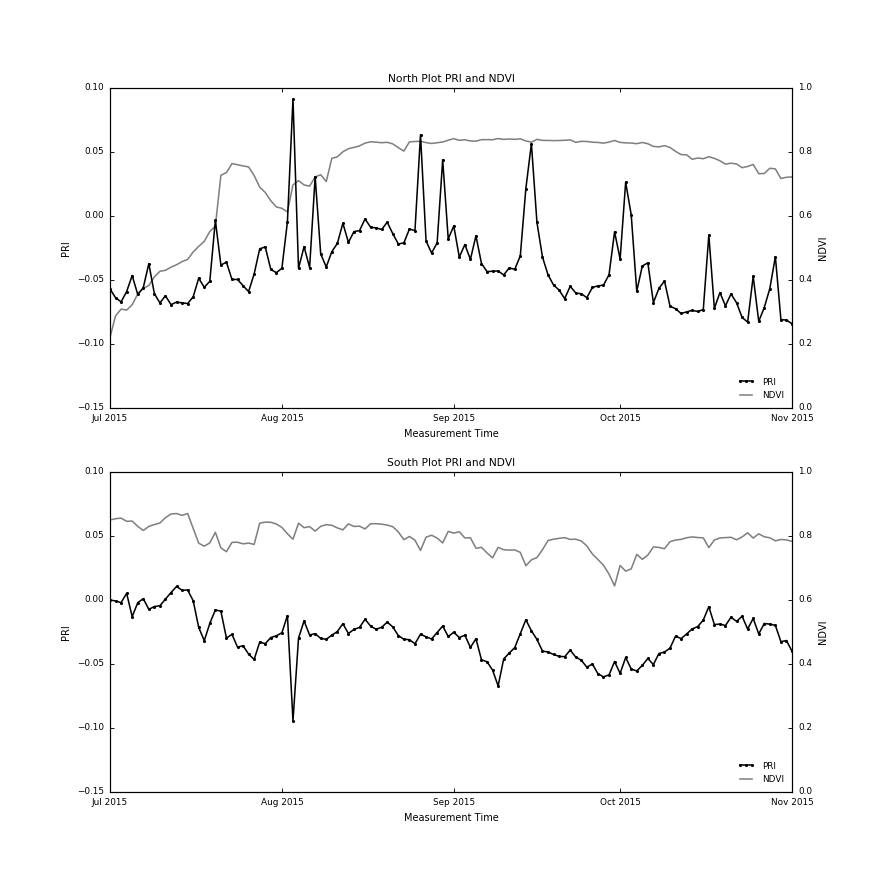

(0, 1)

In [14]:
#### PRI vs NDVI
const_air_mass = (df['Solar Zenith Angle'] > 48-8) & (df['Solar Zenith Angle'] < 48+8)
day_time = (df['Solar Zenith Angle'] < 70)
fig = plt.figure(num=5,figsize=(11,11),facecolor='white',edgecolor='white')


#North
#PRI
ax1 = fig.add_subplot(211)
ax1.plot(df['N raw PRI'][const_air_mass].resample('D').mean().index,df['N raw PRI'][const_air_mass].resample('D').mean(),'.-')
#ax1.plot(df['N alpha PRI'][day_time].resample('D').mean().index,df['N alpha PRI'][day_time].resample('D').mean(),'.')
ax1.set_xlabel('Measurement Time')
ax1.set_ylabel('PRI')
ax1.set_title('North Plot PRI and NDVI')
#VWC
ax2 = ax1.twinx()
ax2.plot(df['N raw NDVI'][day_time].resample('D').median().index,df['N raw NDVI'][day_time].resample('D').median(),c=(0,0,0,0.5))
ax2.set_ylabel('NDVI')

#ax2.yaxis.set_label_coords(0,0.5)


#South
#PRI
ax3 = fig.add_subplot(212)
ax3.plot(df['S raw PRI'][const_air_mass].resample('D').mean().index,df['S raw PRI'][const_air_mass].resample('D').mean(),'.-')
ax3.set_xlabel('Measurement Time')
ax3.set_ylabel('PRI')
ax3.set_title('South Plot PRI and NDVI')
#ax1.yaxis.set_label_coords(0,0.5)

#VWC
ax4 = ax3.twinx()
ax4.plot(df['S raw NDVI'][day_time].resample('D').median().index,df['S raw NDVI'][day_time].resample('D').median(),c=(0,0,0,0.5))
ax4.set_ylabel('NDVI')
#ax2.yaxis.set_label_coords(0,0.5)

#Custom Legends
grayline = matplotlib.lines.Line2D(xdata=[0],ydata=[0],ls='-',c=(0,0,0,0.5))
blackdotline = matplotlib.lines.Line2D(xdata=[0],ydata=[0],ls='-',marker='.',c=(0,0,0,1))
ax1.legend([blackdotline,grayline],['PRI','NDVI'],numpoints=3,loc='lower right',frameon=False)
ax3.legend([blackdotline,grayline],['PRI','NDVI'],numpoints=3,loc='lower right',frameon=False)

for ax in fig.axes:
    ax.xaxis.set_major_locator(monthlocator)
    ax.xaxis.set_major_formatter(formatter)
    ax.set_xlim('2015-07','2015-11')
    #ax.grid(True)
    #ax.set_frame_on(False)
    
ax1.set_ylim(-0.15,0.1)
ax3.set_ylim(-0.15,0.1)
ax2.set_ylim(0,1)
#ax2.yaxis.set_major_locator(matplotlib.ticker.MultipleLocator(300))
ax4.set_ylim(0,1)
#ax4.yaxis.set_major_locator(matplotlib.ticker.MultipleLocator(300))

<IPython.core.display.Javascript object>


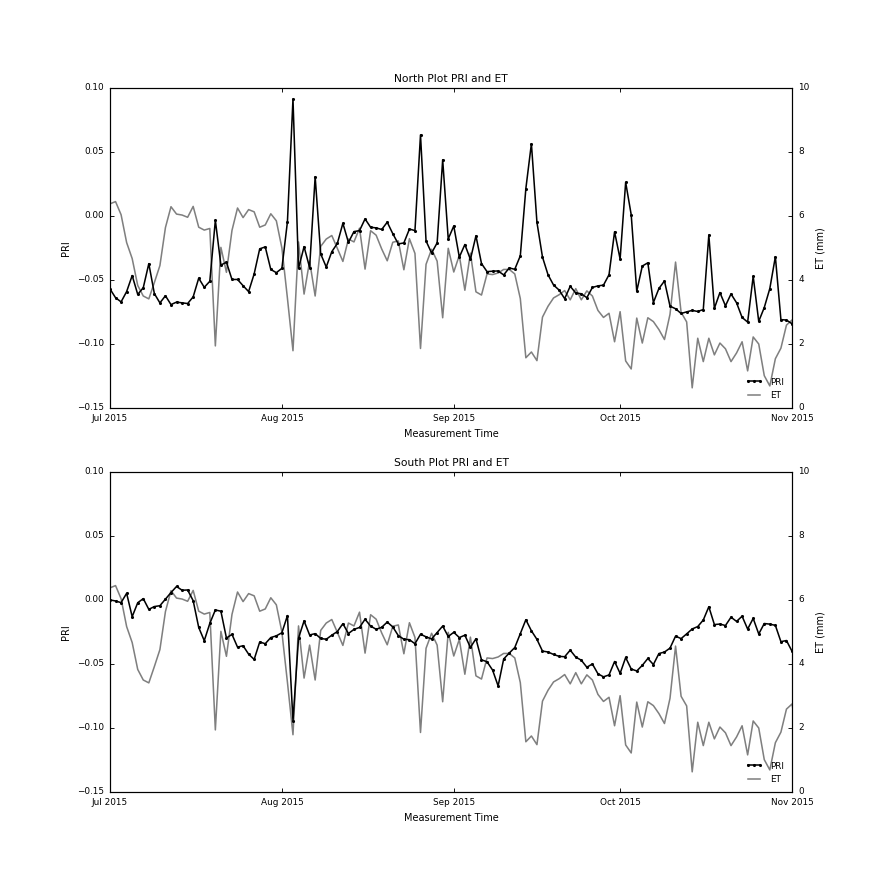

(0, 10)

In [15]:
#### PRI vs ET
const_air_mass = (df['Solar Zenith Angle'] > 48-8) & (df['Solar Zenith Angle'] < 48+8)
day_time = (df['Solar Zenith Angle'] < 70)
fig = plt.figure(num=6,figsize=(11,11),facecolor='white',edgecolor='white')


#North
#PRI
ax1 = fig.add_subplot(211)
ax1.plot(df['N raw PRI'][const_air_mass].resample('D').mean().index,df['N raw PRI'][const_air_mass].resample('D').mean(),'.-')
#ax1.plot(df['N alpha PRI'][day_time].resample('D').mean().index,df['N alpha PRI'][day_time].resample('D').mean(),'.')
ax1.set_xlabel('Measurement Time')
ax1.set_ylabel('PRI')
ax1.set_title('North Plot PRI and ET')
#ET
ax2 = ax1.twinx()
ax2.plot(et.index,et['Daily Ref ET'],c=(0,0,0,0.5))
ax2.set_ylabel('ET (mm)')

#ax2.yaxis.set_label_coords(0,0.5)


#South
#PRI
ax3 = fig.add_subplot(212)
ax3.plot(df['S raw PRI'][const_air_mass].resample('D').mean().index,df['S raw PRI'][const_air_mass].resample('D').mean(),'.-')
ax3.set_xlabel('Measurement Time')
ax3.set_ylabel('PRI')
ax3.set_title('South Plot PRI and ET')
#ax1.yaxis.set_label_coords(0,0.5)

#ET
ax4 = ax3.twinx()
ax4.plot(et.index,et['Daily Ref ET'],c=(0,0,0,0.5))
ax4.set_ylabel('ET (mm)')
#ax2.yaxis.set_label_coords(0,0.5)

#Custom Legends
grayline = matplotlib.lines.Line2D(xdata=[0],ydata=[0],ls='-',c=(0,0,0,0.5))
blackdotline = matplotlib.lines.Line2D(xdata=[0],ydata=[0],ls='-',marker='.',c=(0,0,0,1))
ax1.legend([blackdotline,grayline],['PRI','ET'],numpoints=3,loc='lower right',frameon=False)
ax3.legend([blackdotline,grayline],['PRI','ET'],numpoints=3,loc='lower right',frameon=False)

for ax in fig.axes:
    ax.xaxis.set_major_locator(monthlocator)
    ax.xaxis.set_major_formatter(formatter)
    ax.set_xlim('2015-07','2015-11')
    #ax.grid(True)
    #ax.set_frame_on(False)
    
ax1.set_ylim(-0.15,0.1)
ax3.set_ylim(-0.15,0.1)
ax2.set_ylim(0,10)
#ax2.yaxis.set_major_locator(matplotlib.ticker.MultipleLocator(300))
ax4.set_ylim(0,10)
#ax4.yaxis.set_major_locator(matplotlib.ticker.MultipleLocator(300))

# North PRI vs ET Variables

<IPython.core.display.Javascript object>


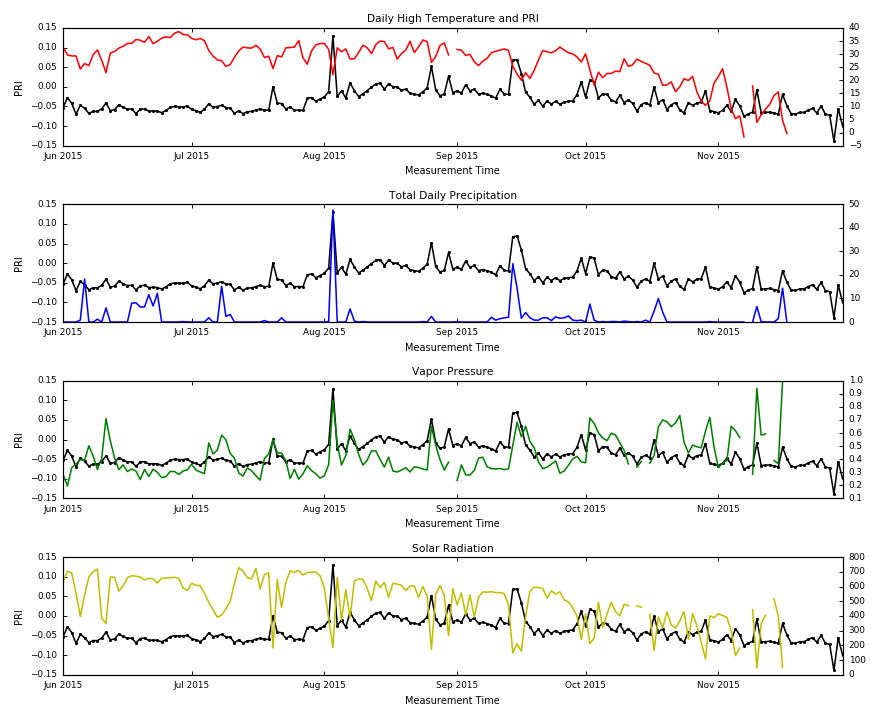

In [16]:
const_air_mass = (df['Solar Zenith Angle'] > 48-8) & (df['Solar Zenith Angle'] < 48+8)
day_time = (df['Solar Zenith Angle'] < 70)
fig = plt.figure(num=17,figsize=(11,9),facecolor='white',edgecolor='white')

ET_variables = ['VP-3 Humidity RH',
               'VP-3 Temp °C',
               'PYR Solar Radiation W/m²', 
               'ECRN-100 Precipitation mm',
               'DS-2 Average Wind m/s']
    
ax1=fig.add_subplot(411)
meanpris=df[day_time]['2015-06':'2015-11']['N raw PRI'].resample('D').mean()
ax1.plot(meanpris.index,meanpris,'.-')
ax1.set_xlabel('Measurement Time')
ax1.set_ylabel('PRI')
ax1.set_title('Daily High Temperature and PRI')
ax2 = ax1.twinx()
maxtemps = df['2015-06':'2015-11']['VP-3 Temp °C'].resample('D').max()
ax2.plot(maxtemps.index,maxtemps,'r')

ax3=fig.add_subplot(412)
ax3.plot(meanpris.index,meanpris,'.-')
ax3.set_xlabel('Measurement Time')
ax3.set_ylabel('PRI')
ax3.set_title('Total Daily Precipitation')
ax4=ax3.twinx()
totalprecip = df['2015-06':'2015-11']['ECRN-100 Precipitation mm'].resample('D').sum()
ax4.plot(totalprecip.index,totalprecip,'b')

ax5=fig.add_subplot(413)
ax5.plot(meanpris.index,meanpris,'.-')
ax5.set_xlabel('Measurement Time')
ax5.set_ylabel('PRI')
ax5.set_title('Vapor Pressure')
ax6=ax5.twinx()
totalprecip = df[day_time]['2015-06':'2015-11']['VP-3 Humidity RH'].resample('D').mean()
ax6.plot(totalprecip.index,totalprecip,'g')

ax7=fig.add_subplot(414)
ax7.plot(meanpris.index,meanpris,'.-')
ax7.set_xlabel('Measurement Time')
ax7.set_ylabel('PRI')
ax7.set_title('Solar Radiation')
ax8=ax7.twinx()
totalprecip = df[day_time]['2015-06':'2015-11']['PYR Solar Radiation W/m²'].resample('D').mean()
ax8.plot(totalprecip.index,totalprecip,'y')

fig.tight_layout()

<IPython.core.display.Javascript object>


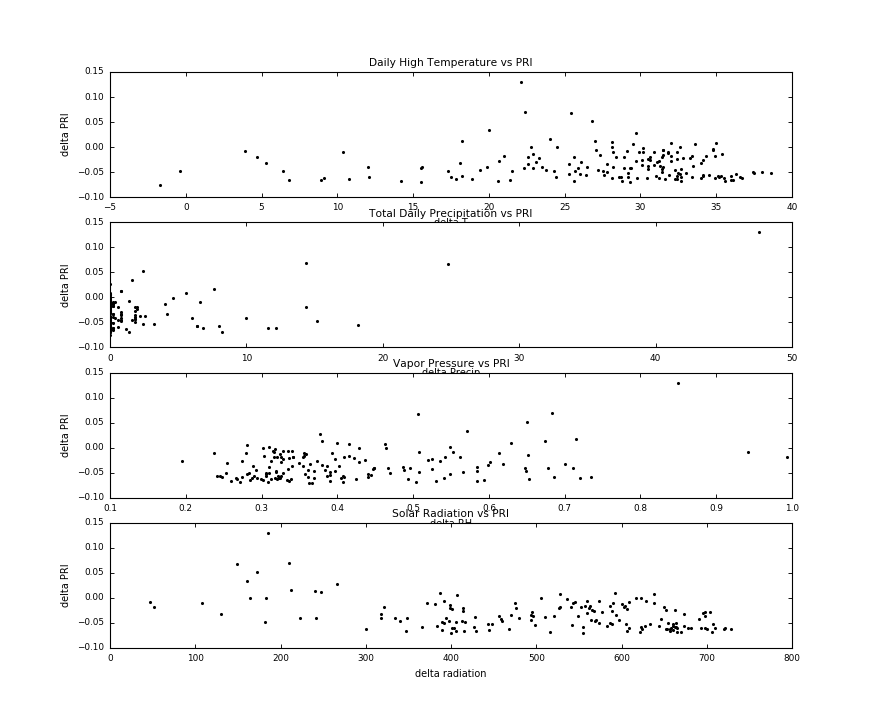

In [19]:
const_air_mass = (df['Solar Zenith Angle'] > 48-8) & (df['Solar Zenith Angle'] < 48+8)
day_time = (df['Solar Zenith Angle'] < 70)
fig = plt.figure(num=12,figsize=(11,9),facecolor='white',edgecolor='white')

ET_variables = ['VP-3 Humidity RH',
               'VP-3 Temp °C',
               'PYR Solar Radiation W/m²', 
               'ECRN-100 Precipitation mm',
               'DS-2 Average Wind m/s']
    
ax1=fig.add_subplot(411)
meanpris=df[day_time]['2015-06':'2015-11']['N raw PRI'].resample('D').mean()#.diff()
maxtemps = df['2015-06':'2015-11']['VP-3 Temp °C'].resample('D').max()#.diff()
ax1.plot(maxtemps,meanpris,'.')
ax1.set_xlabel('delta T')
ax1.set_ylabel('delta PRI')
ax1.set_title('Daily High Temperature vs PRI')


ax3=fig.add_subplot(412)
totalprecip = df['2015-06':'2015-11']['ECRN-100 Precipitation mm'].resample('D').sum()#.diff()
ax3.plot(totalprecip,meanpris,'.')
ax3.set_xlabel('delta Precip')
ax3.set_ylabel('delta PRI')
ax3.set_title('Total Daily Precipitation vs PRI')


ax5=fig.add_subplot(413)
meanhumidity = df[day_time]['2015-06':'2015-11']['VP-3 Humidity RH'].resample('D').mean()#.diff()
ax5.plot(meanhumidity,meanpris,'.')
ax5.set_xlabel('delta RH')
ax5.set_ylabel('delta PRI')
ax5.set_title('Vapor Pressure vs PRI')


ax7=fig.add_subplot(414)
meanradiation = df[day_time]['2015-06':'2015-11']['PYR Solar Radiation W/m²'].resample('D').mean()#.diff()
ax7.plot(meanradiation,meanpris,'.')
ax7.set_xlabel('delta radiation')
ax7.set_ylabel('delta PRI')
ax7.set_title('Solar Radiation vs PRI')


#fig.tight_layout()

<IPython.core.display.Javascript object>


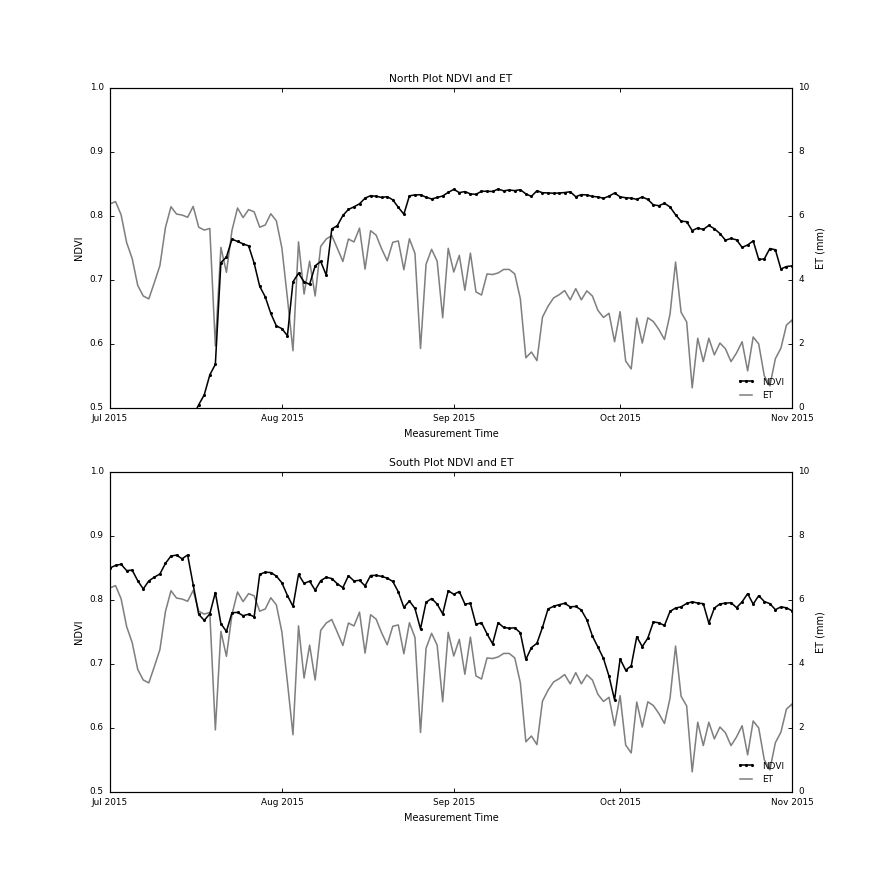

(0, 10)

In [23]:
#### NDVI vs ET
const_air_mass = (df['Solar Zenith Angle'] > 48-8) & (df['Solar Zenith Angle'] < 48+8)
day_time = (df['Solar Zenith Angle'] < 70)
fig = plt.figure(num=7,figsize=(11,11),facecolor='white',edgecolor='white')


#North
#NDVI
ax1 = fig.add_subplot(211)
ax1.plot(df['N raw NDVI'][day_time].resample('D').median().index,df['N raw NDVI'][day_time].resample('D').median(),'.-')
#ax1.plot(df['N alpha NDVI'][day_time].resample('D').mean().index,df['N alpha NDVI'][day_time].resample('D').mean(),'.')
ax1.set_xlabel('Measurement Time')
ax1.set_ylabel('NDVI')
ax1.set_title('North Plot NDVI and ET')
#ET
ax2 = ax1.twinx()
ax2.plot(et.index,et['Daily Ref ET'],c=(0,0,0,0.5))
ax2.set_ylabel('ET (mm)')

#ax2.yaxis.set_label_coords(0,0.5)


#South
#NDVI
ax3 = fig.add_subplot(212)
ax3.plot(df['S raw NDVI'][day_time].resample('D').median().index,df['S raw NDVI'][day_time].resample('D').median(),'.-')
ax3.set_xlabel('Measurement Time')
ax3.set_ylabel('NDVI')
ax3.set_title('South Plot NDVI and ET')
#ax1.yaxis.set_label_coords(0,0.5)

#ET
ax4 = ax3.twinx()
ax4.plot(et.index,et['Daily Ref ET'],c=(0,0,0,0.5))
ax4.set_ylabel('ET (mm)')
#ax2.yaxis.set_label_coords(0,0.5)

#Custom Legends
grayline = matplotlib.lines.Line2D(xdata=[0],ydata=[0],ls='-',c=(0,0,0,0.5))
blackdotline = matplotlib.lines.Line2D(xdata=[0],ydata=[0],ls='-',marker='.',c=(0,0,0,1))
ax1.legend([blackdotline,grayline],['NDVI','ET'],numpoints=3,loc='lower right',frameon=False)
ax3.legend([blackdotline,grayline],['NDVI','ET'],numpoints=3,loc='lower right',frameon=False)

for ax in fig.axes:
    ax.xaxis.set_major_locator(monthlocator)
    ax.xaxis.set_major_formatter(formatter)
    ax.set_xlim('2015-07','2015-11')
    #ax.grid(True)
    #ax.set_frame_on(False)
    
ax1.set_ylim(0.5,1)
ax3.set_ylim(0.5,1)
ax2.set_ylim(0,10)
#ax2.yaxis.set_major_locator(matplotlib.ticker.MultipleLocator(300))
ax4.set_ylim(0,10)
#ax4.yaxis.set_major_locator(matplotlib.ticker.MultipleLocator(300))

<IPython.core.display.Javascript object>


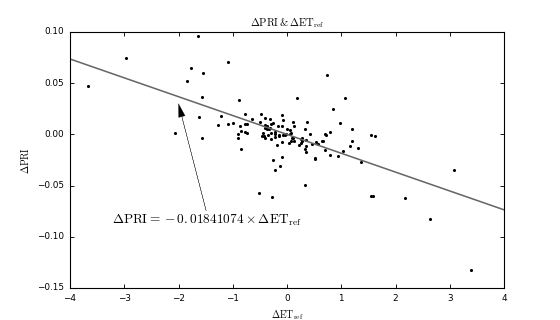

[-0.01841074] [[  3.83862774e-06]]


In [28]:
fig = plt.figure(figsize=(7,4))
ax = fig.add_subplot(111)
y = df[const_air_mass]['2015-07':'2015-10']['N raw PRI'].resample('D').mean()
z = et['Daily Ref ET']['2015-07':'2015-10']
x = np.arange(0,len(y),1)

y2 = df[const_air_mass]['2015-07':'2015-10']['N raw PRI'].resample('D').mean().diff()
y3 = df[const_air_mass]['2015-07':'2015-10']['S raw PRI'].resample('D').mean().diff()
z2 = et['Daily Ref ET']['2015-07':'2015-10'].diff()
frame = pd.DataFrame({'N raw PRI':y2,'Daily Ref ET':z2,'S raw PRI':y3}).dropna()
y2 = frame['N raw PRI']
z2 = frame['Daily Ref ET']
y3 = frame['S raw PRI']
x2 = np.arange(0,len(y2),1)
z3 = np.linspace(-4,4,100)



def fitline(x,a):
    return a*x

popts,pcovs = optimize.curve_fit(fitline,z2,y2,p0=[-0.25])
#slope,intercept,rvalue,pvalue,stderr=stats.linregress(z2,y2)
#fit = np.polyfit(z2,y2,1)
#fit_fn = np.poly1d(fit)

ax.plot(z2,y2,'.')
ax.plot(z3,fitline(z3,*popts))
#ax.plot(z2,slope*z2+intercept)
print(popts,pcovs)
#print(slope,intercept,rvalue**2,pvalue,stderr)
#stderr = np.sqrt(np.diag(pcovs))
#print(2*stderr)
#ax.plot(z3,fitline(z3,*popts+2*stderr),'r:')
#ax.plot(z3,fitline(z3,*popts-2*stderr),'r:')


ax.set_title(r'$\Delta\mathrm{PRI}\/&\/\Delta\mathrm{ET_{ref}}$')
ax.set_ylabel(r'$\Delta\mathrm{PRI}$')
ax.set_xlabel(r'$\Delta\mathrm{ET_{ref}}$')
ax.annotate(s=r'$\Delta\mathrm{PRI}=-0.01841074\times\Delta\mathrm{ET_{ref}}$',
            xytext=(.2,.3),
            textcoords='figure fraction',
            xy=(-2,0.03),
            xycoords='data',
            arrowprops={'width':0.1,'headwidth':6,'color':'k'},
            color='k')

In [27]:
plt.plot(df[['N raw PRI','S raw PRI']][const_air_mass]['2015-07':'2015-11'].resample('D').mean())